In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('BrainTumor.csv')
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
!unzip /content/BrainTumor.zip

Archive:  /content/BrainTumor.zip
   creating: BrainTumor/Brain Tumor/
  inflating: BrainTumor/Brain Tumor/Image1.jpg  
  inflating: BrainTumor/Brain Tumor/Image10.jpg  
  inflating: BrainTumor/Brain Tumor/Image100.jpg  
  inflating: BrainTumor/Brain Tumor/Image1000.jpg  
  inflating: BrainTumor/Brain Tumor/Image1001.jpg  
  inflating: BrainTumor/Brain Tumor/Image1002.jpg  
  inflating: BrainTumor/Brain Tumor/Image1003.jpg  
  inflating: BrainTumor/Brain Tumor/Image1004.jpg  
  inflating: BrainTumor/Brain Tumor/Image1005.jpg  
  inflating: BrainTumor/Brain Tumor/Image1006.jpg  
  inflating: BrainTumor/Brain Tumor/Image1007.jpg  
  inflating: BrainTumor/Brain Tumor/Image1008.jpg  
  inflating: BrainTumor/Brain Tumor/Image1009.jpg  
  inflating: BrainTumor/Brain Tumor/Image101.jpg  
  inflating: BrainTumor/Brain Tumor/Image1010.jpg  
  inflating: BrainTumor/Brain Tumor/Image1011.jpg  
  inflating: BrainTumor/Brain Tumor/Image1012.jpg  
  inflating: BrainTumor/Brain Tumor/Image1013.jpg  


In [ ]:
#Add the 'Image_Path' column to include the full path to the images
df['Image_Path'] = '/content/BrainTumor/Brain Tumor/' + df['Image']
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Image_Path
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155,/content/BrainTumor/Brain Tumor/Image1
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155,/content/BrainTumor/Brain Tumor/Image2
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155,/content/BrainTumor/Brain Tumor/Image3
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155,/content/BrainTumor/Brain Tumor/Image4
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155,/content/BrainTumor/Brain Tumor/Image5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
 15  Image_Path          3762 non-null   object 
dtypes: flo

In [ ]:
# Load the images and their labels into arrays
from PIL import Image
X = []
Y = []
for i in range(len(df)):
    img = Image.open(str(df['Image_Path'][i]) + '.jpg')
    img = img.resize((128, 128))
    X.append(np.array(img))
    Y.append(df['Class'][i])
X = np.array(X) / 255.0

In [ ]:
X.shape

(3762, 128, 128, 3)

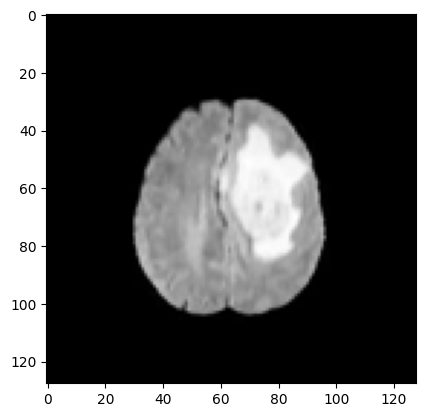

In [ ]:
# Plot One of the Image
plt.imshow(X[10])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Train Images
print(X_train.shape[0])
# Test Images
print(X_test.shape[0])

3009
753


In [ ]:
#  Data augmentation
# to enhance the images
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Visualizing the Process


## Simple Convolution
![](https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

In [ ]:
# Build the model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Output layer with a single neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Summary of Model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
# Train the model
fit=model.fit(datagen.flow((X_train), (Y_train), batch_size=32),epochs=5,validation_data=(np.array(X_test), np.array(Y_test)))

Epoch 1/5
95/95 [==============================] - 95s 981ms/step - loss: 0.6016 - accuracy: 0.6690 - val_loss: 0.4359 - val_accuracy: 0.8021
Epoch 2/5
95/95 [==============================] - 91s 957ms/step - loss: 0.4954 - accuracy: 0.7674 - val_loss: 0.3594 - val_accuracy: 0.8566
Epoch 3/5
95/95 [==============================] - 92s 972ms/step - loss: 0.4550 - accuracy: 0.7936 - val_loss: 0.5393 - val_accuracy: 0.7809
Epoch 4/5
95/95 [==============================] - 89s 935ms/step - loss: 0.4371 - accuracy: 0.7963 - val_loss: 0.4347 - val_accuracy: 0.8154
Epoch 5/5
95/95 [==============================] - 88s 925ms/step - loss: 0.4111 - accuracy: 0.8072 - val_loss: 0.3262 - val_accuracy: 0.8552


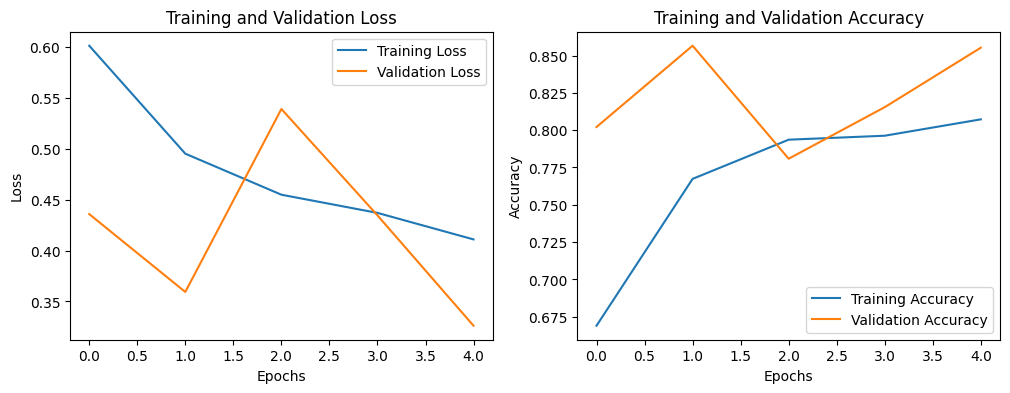

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Calculate and print the accuracy score
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test))
print('Test accuracy:', test_acc)

24/24 [==============================] - 4s 169ms/step - loss: 0.3262 - accuracy: 0.8552
Test accuracy: 0.8552457094192505


In [ ]:
# Plot the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.round(Y_pred)
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)
confusion_mtx

24/24 [==============================] - 8s 333ms/step


array([[374,  45],
       [ 64, 270]])

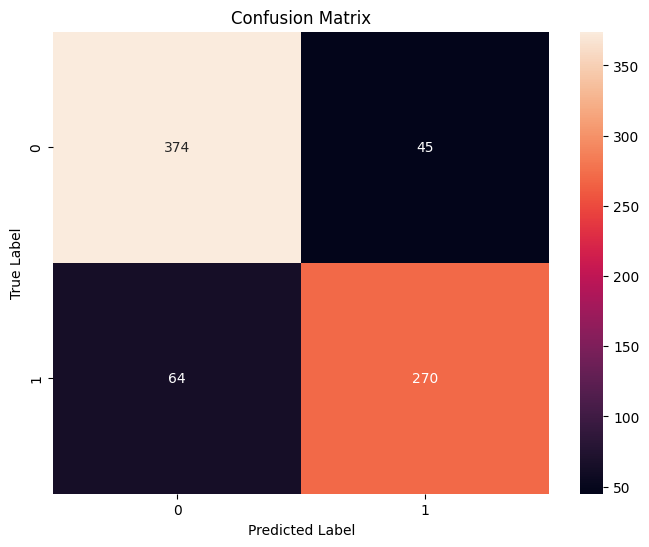

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Convert the image into an array and add an extra dimension
img_predict = X[10]
img_predict = np.expand_dims(img_predict, axis=0)
# Make a prediction using the model
prediction = model.predict(img_predict)
np.round(prediction)


1/1 [==============================] - 0s 45ms/step


array([[1.]], dtype=float32)